In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [140]:
raw = pd.read_csv('./곱창.csv')

In [141]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_id           1000 non-null   int64  
 1   price          1000 non-null   int64  
 2   delivery       600 non-null    float64
 3   category       1000 non-null   int64  
 4   extra_explain  1000 non-null   int64  
 5   event          1000 non-null   int64  
 6   review         543 non-null    float64
 7   total          223 non-null    float64
 8   date           1000 non-null   object 
 9   cart           1000 non-null   int64  
 10  rank           1000 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB


In [142]:
raw.head(1).transpose()

,0
p_id,0
price,7900
delivery,NaN
category,1
extra_explain,19
event,0
review,108290.0
total,NaN
date,2021-10-01
cart,156


In [143]:
raw[raw.columns[1:-1]].describe()

,price,delivery,category,extra_explain,event,review,total,cart
count,1000.000000,600.000000,1000.0,1000.00000,1000.000000,543.000000,223.000000,1000.000000
mean,23594.740000,3441.633333,1.0,10.35000,0.158000,1486.156538,831.547085,63.278000
std,29924.411225,551.179339,0.0,13.66544,0.364924,10374.736865,3417.523319,444.549976
min,200.000000,2500.000000,1.0,0.00000,0.000000,1.000000,1.000000,0.000000
25%,9900.000000,3000.000000,1.0,0.00000,0.000000,3.000000,8.000000,0.000000
50%,14950.000000,3500.000000,1.0,0.00000,0.000000,17.000000,29.000000,0.000000
75%,26270.000000,4000.000000,1.0,20.25000,0.000000,122.000000,173.000000,5.000000
max,317290.000000,7000.000000,1.0,46.00000,1.000000,157180.000000,33307.000000,7128.000000


<AxesSubplot: >

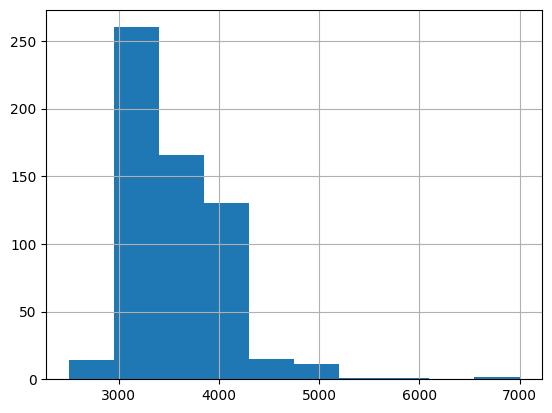

In [144]:
raw['delivery'].hist()

In [145]:
raw['delivery'] = raw['delivery'].fillna(raw['delivery'].mean())

In [146]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_id           1000 non-null   int64  
 1   price          1000 non-null   int64  
 2   delivery       1000 non-null   float64
 3   category       1000 non-null   int64  
 4   extra_explain  1000 non-null   int64  
 5   event          1000 non-null   int64  
 6   review         543 non-null    float64
 7   total          223 non-null    float64
 8   date           1000 non-null   object 
 9   cart           1000 non-null   int64  
 10  rank           1000 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB


In [ ]:
raw['review'].describe()

<AxesSubplot: >

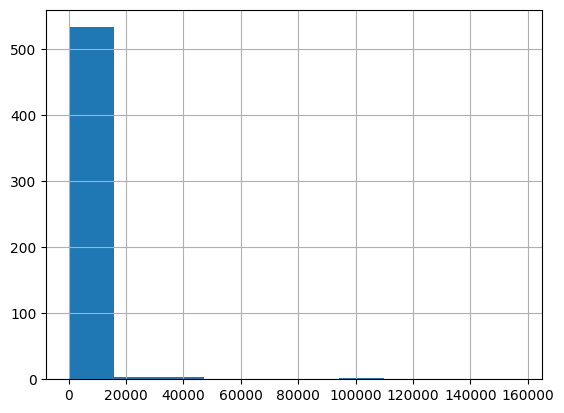

In [147]:
raw['review'].hist()

<AxesSubplot: >

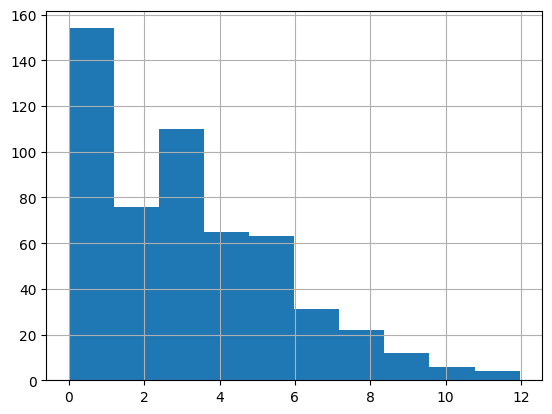

In [46]:
np.log(raw['review']).hist()

In [149]:
raw['total'].describe()

count      223.000000
mean       831.547085
std       3417.523319
min          1.000000
25%          8.000000
50%         29.000000
75%        173.000000
max      33307.000000
Name: total, dtype: float64

<AxesSubplot: >

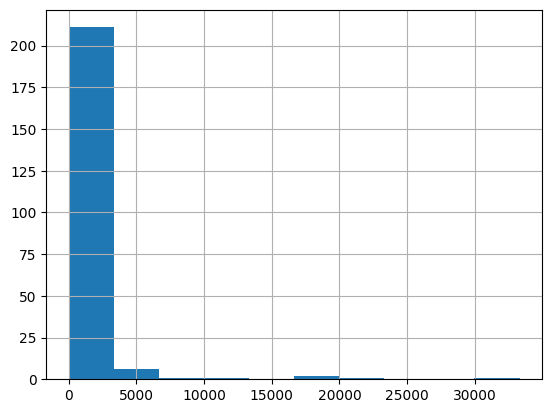

In [150]:
raw['total'].hist()

<AxesSubplot: >

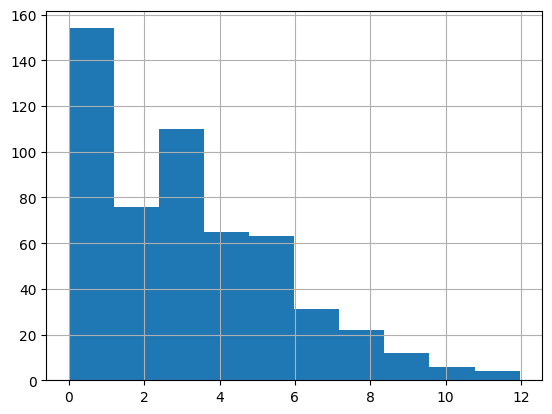

In [151]:
np.log(raw['review']).hist()

In [152]:
for i in range(len(raw)):
    
    # total, review 둘다 결측치인 행은 1값으로 대체 후 log
    if np.isnan(raw.loc[i,'total']) and np.isnan(raw.loc[i,'review']):
        raw.loc[i, 'total'] = 1
        raw.loc[i, 'review'] = 1
                
    elif np.isnan(raw.loc[i,'total']) == False and np.isnan(raw.loc[i,'review']) == True:
        raw.loc[i, 'review'] = raw.loc[i, 'total']
        
    elif np.isnan(raw.loc[i,'review']) == False and np.isnan(raw.loc[i,'total']) == True:
        raw.loc[i, 'total'] = raw.loc[i, 'review']

raw['total'] = np.log(raw['total'])
raw['review'] = np.log(raw['review'])

raw.describe()        

,p_id,price,delivery,category,extra_explain,event,review,total,cart,rank
count,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,23594.740000,3441.633333,1.0,10.35000,0.158000,1.723681,1.621548,63.278000,500.500000
std,288.819436,29924.411225,426.799200,0.0,13.66544,0.364924,2.452133,2.280229,444.549976,288.819436
min,0.000000,200.000000,2500.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,249.750000,9900.000000,3000.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,250.750000
50%,499.500000,14950.000000,3441.633333,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,500.500000
75%,749.250000,26270.000000,3500.000000,1.0,20.25000,0.000000,2.995732,2.903889,5.000000,750.250000
max,999.000000,317290.000000,7000.000000,1.0,46.00000,1.000000,11.965147,11.592568,7128.000000,1000.000000


In [127]:
raw['total'] = np.log(raw['total'])

In [128]:
raw['review'] = np.log(raw['review'])

<AxesSubplot: >

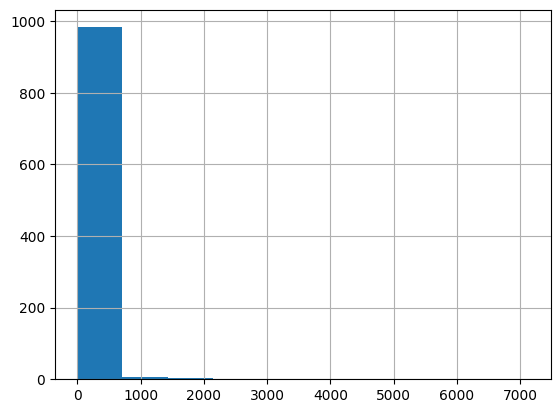

In [153]:
raw['cart'].hist()

In [158]:
# cart ESD 로 이상값 대체

max_esd = raw['cart'].mean() + 3*raw['cart'].std()
min_esd = raw['cart'].mean() - 3*raw['cart'].std()

print(max_esd, min_esd)


1396.9279287956253 -1270.3719287956253


<AxesSubplot: >

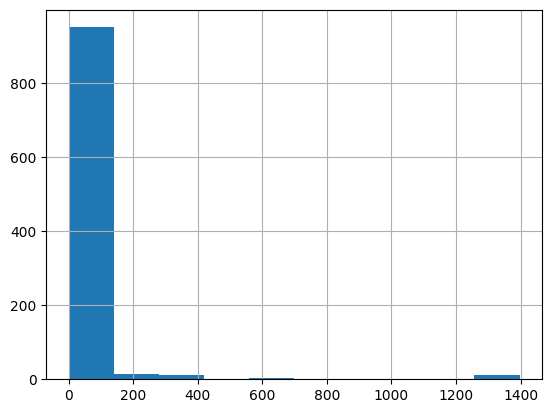

In [159]:
for i in range(len(raw)):
    
    if raw.loc[i, 'cart'] > max_esd:
        raw.loc[i, 'cart'] = max_esd
    elif raw.loc[i, 'cart'] < min_esd:
        raw.loc[i, 'cart'] = min_esd

raw['cart'].hist()

In [163]:
raw.describe() 

,p_id,price,delivery,category,extra_explain,event,review,total,cart,rank
count,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,23594.740000,3441.633333,1.0,10.35000,0.158000,1.723681,1.621548,37.662279,500.500000
std,288.819436,29924.411225,426.799200,0.0,13.66544,0.364924,2.452133,2.280229,171.748758,288.819436
min,0.000000,200.000000,2500.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,249.750000,9900.000000,3000.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,250.750000
50%,499.500000,14950.000000,3441.633333,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,500.500000
75%,749.250000,26270.000000,3500.000000,1.0,20.25000,0.000000,2.995732,2.903889,5.000000,750.250000
max,999.000000,317290.000000,7000.000000,1.0,46.00000,1.000000,11.965147,11.592568,1396.927929,1000.000000


In [170]:
raw['year'] = pd.to_datetime(raw['date']).dt.year
raw['month'] = pd.to_datetime(raw['date']).dt.month

In [175]:
raw['how_long'] = (12 * (2022 - raw['year'])) + (12 - raw['month'])

In [176]:
raw.head()

,p_id,price,delivery,category,extra_explain,event,review,total,date,cart,rank,year,month,how_long
0,0,7900,3441.633333,1,19,0,11.592568,11.592568,2021-10-01,156.000000,1,2021,10,14
1,1,16900,3000.000000,1,28,0,11.504641,10.001249,2018-08-01,1396.927929,2,2018,8,52
2,2,10900,3000.000000,1,42,0,11.965147,10.413523,2018-06-01,1396.927929,3,2018,6,54
3,3,7900,3441.633333,1,11,0,11.318564,11.318564,2021-11-01,84.000000,4,2021,11,13
4,4,7800,3500.000000,1,32,0,8.545975,7.927685,2019-08-01,724.000000,5,2019,8,40


In [177]:
raw.columns

Index(['p_id', 'price', 'delivery', 'category', 'extra_explain', 'event',
       'review', 'total', 'date', 'cart', 'rank', 'year', 'month', 'how_long'],
      dtype='object')

In [179]:
new_raw = raw[['p_id', 'price', 'delivery', 'category', 'extra_explain', 'event',
       'review', 'total', 'cart', 'year', 'month', 'how_long', 'rank']]

,p_id,price,delivery,category,extra_explain,event,review,total,cart,year,month,how_long,rank
0,0,7900,3441.633333,1,19,0,11.592568,11.592568,156.000000,2021,10,14,1
1,1,16900,3000.000000,1,28,0,11.504641,10.001249,1396.927929,2018,8,52,2
2,2,10900,3000.000000,1,42,0,11.965147,10.413523,1396.927929,2018,6,54,3
3,3,7900,3441.633333,1,11,0,11.318564,11.318564,84.000000,2021,11,13,4
4,4,7800,3500.000000,1,32,0,8.545975,7.927685,724.000000,2019,8,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,5000,3000.000000,1,0,0,2.995732,1.386294,5.000000,2021,1,23,996
996,996,31500,3000.000000,1,20,0,0.000000,0.000000,1.000000,2020,12,24,997
997,997,3860,3441.633333,1,0,0,0.000000,0.000000,0.000000,2022,12,0,998
998,998,43100,3441.633333,1,0,0,0.000000,0.000000,0.000000,2022,12,0,999


In [260]:
new_raw['rank'] = new_raw['rank'].sort_values(ascending=False)

In [261]:
from sklearn.model_selection import train_test_split

X = new_raw.iloc[:,:-1]
y = new_raw.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                   test_size=0.2,
                                                   random_state=2022)

In [262]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_val = ['price', 'delivery', 'extra_explain',
       'review', 'total', 'cart', 'year', 'month', 'how_long']

X_train[scale_val] = scaler.fit_transform(X_train[scale_val])
X_test[scale_val] = scaler.transform(X_test[scale_val])

In [263]:
var = ['price', 'delivery', 'extra_explain', 'event',
       'review', 'total', 'cart', 'year', 'month', 'how_long']

In [281]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model.fit(X_train[var],y_train)
predictions = model.predict(X_test[var])

In [282]:
r_sq = model.score(X_train[var],y_train)
r_sq

0.9986371555055851

In [284]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(predictions,y_test))

0.10059281397004749


In [230]:
import shap

In [245]:
shap_values = shap.TreeExplainer(model).shap_values(X_train[var])

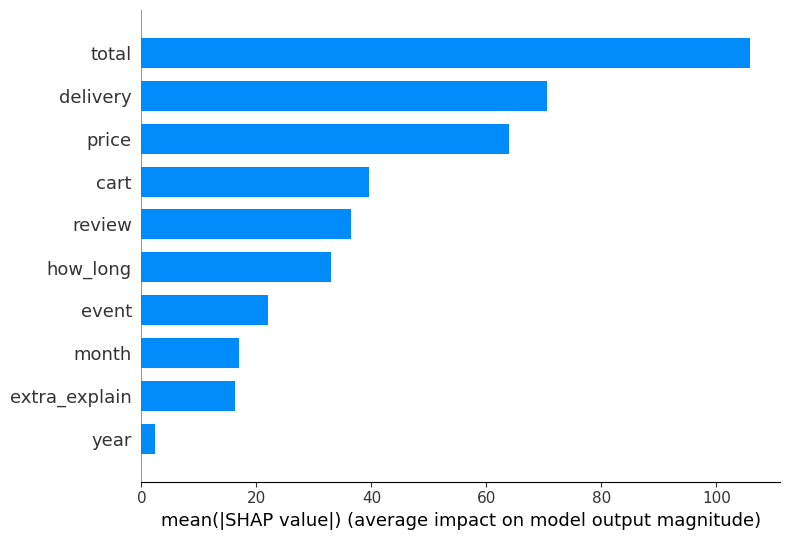

In [246]:
shap.summary_plot(shap_values, X_train[var], plot_type='bar')

In [249]:
from pycaret.regression import *

In [267]:
caret_df = new_raw[['price', 'delivery', 'extra_explain', 'event',
                    'review', 'total', 'cart', 'year', 'month', 
                    'how_long', 'rank']]

In [274]:
caret_df['rank'].sort_values(ascending=False).reset_index(drop=True)

0      1000
1       999
2       998
3       997
4       996
       ... 
995       5
996       4
997       3
998       2
999       1
Name: rank, Length: 1000, dtype: int64

In [275]:
caret_df['rank'] = caret_df['rank'].sort_values(ascending=False).reset_index(drop=True)
caret_df

,price,delivery,extra_explain,event,review,total,cart,year,month,how_long,rank
0,7900,3441.633333,19,0,11.592568,11.592568,156.000000,2021,10,14,1000
1,16900,3000.000000,28,0,11.504641,10.001249,1396.927929,2018,8,52,999
2,10900,3000.000000,42,0,11.965147,10.413523,1396.927929,2018,6,54,998
3,7900,3441.633333,11,0,11.318564,11.318564,84.000000,2021,11,13,997
4,7800,3500.000000,32,0,8.545975,7.927685,724.000000,2019,8,40,996
...,...,...,...,...,...,...,...,...,...,...,...
995,5000,3000.000000,0,0,2.995732,1.386294,5.000000,2021,1,23,5
996,31500,3000.000000,20,0,0.000000,0.000000,1.000000,2020,12,24,4
997,3860,3441.633333,0,0,0.000000,0.000000,0.000000,2022,12,0,3
998,43100,3441.633333,0,0,0.000000,0.000000,0.000000,2022,12,0,2


In [276]:
caret_model = setup(caret_df, target='rank', train_size=0.8)

,Description,Value
0,session_id,2834
1,Target,rank
2,Original Data,"(1000, 11)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(800, 47)"


In [277]:
comp = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,158.5922,44868.3878,210.9345,0.4481,0.8485,2.3300,0.0800
lightgbm,Light Gradient Boosting Machine,164.4772,46018.0519,213.2667,0.4371,0.8532,2.2464,0.0180
gbr,Gradient Boosting Regressor,169.9224,46650.2096,215.1836,0.4289,0.8793,2.4842,0.0220
ada,AdaBoost Regressor,188.3277,51445.3509,226.2337,0.3701,0.9045,2.5896,0.0220
et,Extra Trees Regressor,163.1176,51797.4894,226.5893,0.3618,0.8505,2.3378,0.0750
br,Bayesian Ridge,187.5257,52321.0461,228.2213,0.3574,0.8988,2.5399,0.0070
lasso,Lasso Regression,187.9353,52406.5554,228.4162,0.3561,0.8989,2.5526,0.3590
ridge,Ridge Regression,191.0868,53660.5804,231.1475,0.3407,0.8986,2.5422,0.0060
en,Elastic Net,190.1695,53712.3816,231.2010,0.3410,0.9082,2.5755,0.0060
lr,Linear Regression,191.9973,54066.7374,232.0549,0.3357,0.8991,2.5285,0.9920
